In [2]:
import numpy as np

In [3]:
import pandas as pd

In [30]:
M1 = np.array([[2,3,0],[3,3,3]])
M1

array([[2, 3, 0],
       [3, 3, 3]])

In [42]:
M1.shape

(2, 3)

In [32]:
M1[1,1] = 7

In [34]:
M1

array([[2, 3, 0],
       [3, 7, 3]])

In [43]:
M1_2 = np.array([[1,1,1]])

In [44]:
M1_2.shape

(1, 3)

In [45]:
M = np.append(M1,M1_2,axis=0)

In [46]:
M2 = np.eye(3)
M2

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [48]:
M

array([[2, 3, 0],
       [3, 7, 3],
       [1, 1, 1]])

In [49]:
add = np.add(M,M2)
add

array([[3., 3., 0.],
       [3., 8., 3.],
       [1., 1., 2.]])

In [52]:
mult = np.multiply(M,M2)
mult

array([[2., 0., 0.],
       [0., 7., 0.],
       [0., 0., 1.]])

In [53]:
#Producto punto entre matrices
dot = np.dot(M,M2)
dot

array([[2., 3., 0.],
       [3., 7., 3.],
       [1., 1., 1.]])

In [54]:
dot2 = np.dot(M2,M)
dot2

array([[2., 3., 0.],
       [3., 7., 3.],
       [1., 1., 1.]])

In [55]:
det = np.linalg.det(M)
det

8.000000000000002

In [4]:
#Vemos donde estamos parados
pwd

'/Users/joacolopezcruz/Documents/Python4DS/Week5-Visualization'

In [5]:
#Que contiene el directorio
ls

05a_Matplotlib_Notebook.ipynb*
05b_Exploring Indicator's Across Countries.ipynb*
05c_Folium_Notebook.ipynb*
Untitled.ipynb
world-development-indicators/
world-development-indicators.zip


In [6]:
#Cargamos un DataFrame con el archivo csv "Indicators" y vemos su dimensión
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [7]:
#Vemos un preview del df
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [8]:
#Enlistamos los indicadores, trabajaremos con el crecimiento de población 
Ind_Count = data['IndicatorName'].value_counts()
Ind_Count

Population, total                                                                              13484
Population growth (annual %)                                                                   13442
Urban population (% of total)                                                                  13415
Rural population (% of total population)                                                       13415
Urban population                                                                               13374
                                                                                               ...  
Present value of external debt (% of exports of goods, services and primary income)               69
Benefits incidence in poorest quintile (%) - All Labor Market                                     67
Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households)         67
Survey mean consumption or income per capita, total population (2005 PPP $ per day)        

In [9]:
#Generamos una máscara para obtener un dataframe solo con filas sobre este indicador en específico y generamos un preview
Mask_G = data['IndicatorName'].str.contains('Population growth')
Growth1 = data[Mask_G]
Growth1.head(4)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3585,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,1960,1.813677
3637,Albania,ALB,Population growth (annual %),SP.POP.GROW,1960,3.015423
3805,Algeria,DZA,Population growth (annual %),SP.POP.GROW,1960,2.511488
3831,American Samoa,ASM,Population growth (annual %),SP.POP.GROW,1960,1.424246


In [10]:
#Intentamos trabajar con el crecimiento poblacional de Chile, pero no existen filas de Chile para este indicador
'Chile' in Growth1['CountryName']

False

In [11]:
#Agrupamos en un nuevo df que tiene un promedio de crecimiento anual, ahora mundial, no por paises
df = Growth1.groupby('Year').mean()
#Debemos resetear los indices del df
df.reset_index(inplace=True)
df.head()

,Year,Value
0,1960,2.305909
1,1961,2.244430
2,1962,2.293819
3,1963,2.301000
4,1964,2.288439


In [12]:
import matplotlib.pyplot as plt

In [13]:
df['Year']

0     1960
1     1961
2     1962
3     1963
4     1964
5     1965
6     1966
7     1967
8     1968
9     1969
10    1970
11    1971
12    1972
13    1973
14    1974
15    1975
16    1976
17    1977
18    1978
19    1979
20    1980
21    1981
22    1982
23    1983
24    1984
25    1985
26    1986
27    1987
28    1988
29    1989
30    1990
31    1991
32    1992
33    1993
34    1994
35    1995
36    1996
37    1997
38    1998
39    1999
40    2000
41    2001
42    2002
43    2003
44    2004
45    2005
46    2006
47    2007
48    2008
49    2009
50    2010
51    2011
52    2012
53    2013
54    2014
Name: Year, dtype: int64

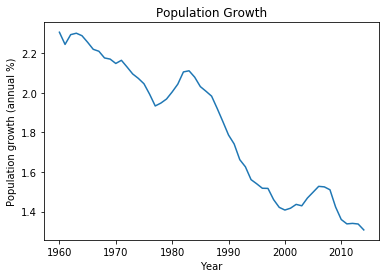

In [17]:
# get the years
years = df['Year'].values
# get the values 
growth = df['Value'].values

# switch to a line plot
plt.plot(years, growth)

# Label the axes
plt.xlabel('Year')
plt.ylabel(Growth1['IndicatorName'].iloc[0])

#label the figure
plt.title('Population Growth')

# to make more honest, start they y axis at 0
#plt.axis([2000, 2011,0,1.6])

plt.show()

# Ahora buscaremos ver si existe relación entre "comida, bebestibles y tabaco" con la maternidad adolecente

In [19]:
#Generamos dos df, uno para cada indicador
Ind_1 = 'Food, beverages and tobacco'
Ind_2 = 'Adolescent fertility rate'

Mask_1 = data['IndicatorName'].str.contains(Ind_1)
Mask_2 = data['IndicatorName'].str.contains(Ind_2)

data1 = data[Mask_1]
data2 = data[Mask_2]

In [21]:
#Preview
data1.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
83379,Australia,AUS,"Food, beverages and tobacco (% of value added ...",NV.MNF.FBTO.ZS.UN,1963,14.866728
83604,Austria,AUT,"Food, beverages and tobacco (% of value added ...",NV.MNF.FBTO.ZS.UN,1963,18.719981
84241,Belgium,BEL,"Food, beverages and tobacco (% of value added ...",NV.MNF.FBTO.ZS.UN,1963,18.893447
86220,Canada,CAN,"Food, beverages and tobacco (% of value added ...",NV.MNF.FBTO.ZS.UN,1963,16.459627
86826,Chile,CHL,"Food, beverages and tobacco (% of value added ...",NV.MNF.FBTO.ZS.UN,1963,25.149701


In [22]:
#Preview
data2.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
80,Caribbean small states,CSS,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,162.871212
157,Central Europe and the Baltics,CEB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,46.716752
228,East Asia & Pacific (all income levels),EAS,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,66.015974
350,East Asia & Pacific (developing only),EAP,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,75.043631


In [23]:
#Agrupamos en un nuevo df que tiene un promedio, ahora mundial, no por paises
df1 = data1.groupby('Year').mean()
#Debemos resetear los indices del df
df1.reset_index(inplace=True)
df1.head()

,Year,Value
0,1963,30.734118
1,1964,31.231300
2,1965,30.657431
3,1966,30.396178
4,1967,31.305249


In [25]:
df1.shape

(49, 2)

In [26]:
#Agrupamos en un nuevo df que tiene un promedio, ahora mundial, no por paises
df2 = data2.groupby('Year').mean()
#Debemos resetear los indices del df
df2.reset_index(inplace=True)
df2.head()

,Year,Value
0,1960,100.461150
1,1961,100.438160
2,1962,100.398324
3,1963,99.859549
4,1964,99.322426


In [27]:
df2.shape

(55, 2)

In [28]:
#Vemos que el rango de años que estemos comparando sea correcto
print("Min Year = ", df1['Year'].min(), "max: ", df1['Year'].max())
print("Min Year = ", df2['Year'].min(), "max: ", df2['Year'].max())

Min Year =  1963 max:  2011
Min Year =  1960 max:  2014


In [33]:
#Truncamos a los mismos años que en df1
Mask_3 = df2['Year'] < 2012
Mask_4 = df2['Year'] > 1962
df2_t = df2[Mask_3 & Mask_4]
df2_t.shape

(49, 2)

In [34]:
#Comprobamos que tengan la misma historia
print("Min Year = ", df1['Year'].min(), "max: ", df1['Year'].max())
print("Min Year = ", df2_t['Year'].min(), "max: ", df2_t['Year'].max())

Min Year =  1963 max:  2011
Min Year =  1963 max:  2011


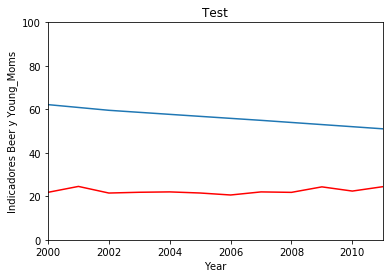

In [38]:
# get the years
years_1 = df1['Year'].values
years_2 = df2_t['Year'].values

# get the values 
Beers = df1['Value'].values
Young_Moms = df2_t['Value'].values

# switch to a line plot
plt.plot(years_1, Beers, color='red')
plt.plot(years_2, Young_Moms)

# Label the axes
plt.xlabel('Year')
plt.ylabel('Indicadores Beer y Young_Moms')

#label the figure
plt.title('Test')

# to make more honest, start they y axis at 0
plt.axis([2000, 2011,0,100])

plt.show()

In [37]:
#Vemos la correlacion
df1['Value'].corr(df2_t['Value'])

0.9516803596936914